# 0. Install Dependencies

In [ ]:
#Install stabe-baselines3 if not installed
!pip install 'stable-baselines3[extra]'

In [1]:
#Importing required dependencies
import os
import gym as gym
from stable_baselines3 import DQN
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.monitor import Monitor

# 1. Testing if the environment is working

In [2]:
env_name = 'LunarLander-v2'
env = gym.make(env_name)
episodes = 5
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0
    
    while not done:
        env.render()
        action = env.action_space.sample()
        n_state, reward, done, truncated, info = env.step(action)
        score += reward
    print('Episode:{} Score:{}'.format(episode, score))
#env.close()

Episode:1 Score:-341.36398356010557
Episode:2 Score:-323.78933497740974
Episode:3 Score:-79.39539416597404
Episode:4 Score:-88.49549708356923
Episode:5 Score:-117.46707342155084


/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/gym/envs/box2d/lunar_lander.py:604: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("LunarLander-v2", render_mode="rgb_array")
  gym.logger.warn(


# 2. Training
### Based on stablebaselines-3 official documentation, Gym official documentation, and Nicholas Renotte's RL course on Youtube

In [3]:
log_path = os.path.join('Training', 'Logs')

In [4]:
log_path

'Training/Logs'

In [5]:
#Instantiating the environment with the adversarial conditions
env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )

"""
Vectorizing the environment so that the neural network is fed with batches of vectors from game
episodes instead of one episode at a time
"""
env = DummyVecEnv([lambda: Monitor(env, log_path)])

"""
Instantiating the RL algorithm, with Multi layer perceptron as a function approximator.
Training metrics are saved to the log_path file: Logs
"""

model = DQN('MlpPolicy', env, verbose=1, tensorboard_log=log_path)

Using cpu device


In [6]:
#Training the model for 1 Million timestep.
model.learn(total_timesteps=1000000)

2023-04-27 09:58:54.720230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Logging to Training/Logs/DQN_2
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 80.8     |
|    ep_rew_mean      | -273     |
|    exploration_rate | 0.997    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 26       |
|    time_elapsed     | 12       |
|    total_timesteps  | 323      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 77.6     |
|    ep_rew_mean      | -223     |
|    exploration_rate | 0.994    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 50       |
|    time_elapsed     | 12       |
|    total_timesteps  | 621      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 86.4     |
|    ep_rew_mean      | -280     |
|    exploration_rate | 0.99     |
| time/               | 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.5     |
|    ep_rew_mean      | -301     |
|    exploration_rate | 0.922    |
| time/               |          |
|    episodes         | 92       |
|    fps              | 556      |
|    time_elapsed     | 14       |
|    total_timesteps  | 8237     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.2     |
|    ep_rew_mean      | -305     |
|    exploration_rate | 0.919    |
| time/               |          |
|    episodes         | 96       |
|    fps              | 573      |
|    time_elapsed     | 14       |
|    total_timesteps  | 8559     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.1     |
|    ep_rew_mean      | -306     |
|    exploration_rate | 0.915    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 91.1     |
|    ep_rew_mean      | -329     |
|    exploration_rate | 0.846    |
| time/               |          |
|    episodes         | 180      |
|    fps              | 930      |
|    time_elapsed     | 17       |
|    total_timesteps  | 16259    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 90.5     |
|    ep_rew_mean      | -326     |
|    exploration_rate | 0.843    |
| time/               |          |
|    episodes         | 184      |
|    fps              | 941      |
|    time_elapsed     | 17       |
|    total_timesteps  | 16544    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.9     |
|    ep_rew_mean      | -321     |
|    exploration_rate | 0.84     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | -308     |
|    exploration_rate | 0.765    |
| time/               |          |
|    episodes         | 268      |
|    fps              | 1175     |
|    time_elapsed     | 21       |
|    total_timesteps  | 24708    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.7     |
|    ep_rew_mean      | -310     |
|    exploration_rate | 0.762    |
| time/               |          |
|    episodes         | 272      |
|    fps              | 1185     |
|    time_elapsed     | 21       |
|    total_timesteps  | 25046    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 95.6     |
|    ep_rew_mean      | -312     |
|    exploration_rate | 0.758    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.7     |
|    ep_rew_mean      | -302     |
|    exploration_rate | 0.69     |
| time/               |          |
|    episodes         | 356      |
|    fps              | 1379     |
|    time_elapsed     | 23       |
|    total_timesteps  | 32613    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.5     |
|    ep_rew_mean      | -299     |
|    exploration_rate | 0.687    |
| time/               |          |
|    episodes         | 360      |
|    fps              | 1387     |
|    time_elapsed     | 23       |
|    total_timesteps  | 32962    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 89.3     |
|    ep_rew_mean      | -306     |
|    exploration_rate | 0.684    |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.2     |
|    ep_rew_mean      | -319     |
|    exploration_rate | 0.617    |
| time/               |          |
|    episodes         | 444      |
|    fps              | 1541     |
|    time_elapsed     | 26       |
|    total_timesteps  | 40348    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 87.5     |
|    ep_rew_mean      | -315     |
|    exploration_rate | 0.614    |
| time/               |          |
|    episodes         | 448      |
|    fps              | 1547     |
|    time_elapsed     | 26       |
|    total_timesteps  | 40684    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 88.1     |
|    ep_rew_mean      | -322     |
|    exploration_rate | 0.61     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.3     |
|    ep_rew_mean      | -305     |
|    exploration_rate | 0.547    |
| time/               |          |
|    episodes         | 532      |
|    fps              | 1667     |
|    time_elapsed     | 28       |
|    total_timesteps  | 47708    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.5     |
|    ep_rew_mean      | -302     |
|    exploration_rate | 0.543    |
| time/               |          |
|    episodes         | 536      |
|    fps              | 1673     |
|    time_elapsed     | 28       |
|    total_timesteps  | 48081    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 84.6     |
|    ep_rew_mean      | -301     |
|    exploration_rate | 0.54     |
| time/               |          |
|    episodes       

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.5     |
|    ep_rew_mean      | -429     |
|    exploration_rate | 0.474    |
| time/               |          |
|    episodes         | 604      |
|    fps              | 1514     |
|    time_elapsed     | 36       |
|    total_timesteps  | 55414    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.82     |
|    n_updates        | 1353     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 100      |
|    ep_rew_mean      | -432     |
|    exploration_rate | 0.47     |
| time/               |          |
|    episodes         | 608      |
|    fps              | 1492     |
|    time_elapsed     | 37       |
|    total_timesteps  | 55834    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.93     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 129      |
|    ep_rew_mean      | -402     |
|    exploration_rate | 0.394    |
| time/               |          |
|    episodes         | 668      |
|    fps              | 1271     |
|    time_elapsed     | 50       |
|    total_timesteps  | 63791    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.1      |
|    n_updates        | 3447     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 129      |
|    ep_rew_mean      | -385     |
|    exploration_rate | 0.389    |
| time/               |          |
|    episodes         | 672      |
|    fps              | 1263     |
|    time_elapsed     | 50       |
|    total_timesteps  | 64283    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.671    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 142      |
|    ep_rew_mean      | -273     |
|    exploration_rate | 0.305    |
| time/               |          |
|    episodes         | 732      |
|    fps              | 1125     |
|    time_elapsed     | 64       |
|    total_timesteps  | 73139    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.41     |
|    n_updates        | 5784     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 145      |
|    ep_rew_mean      | -274     |
|    exploration_rate | 0.297    |
| time/               |          |
|    episodes         | 736      |
|    fps              | 1112     |
|    time_elapsed     | 66       |
|    total_timesteps  | 74038    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.674    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 172      |
|    ep_rew_mean      | -273     |
|    exploration_rate | 0.191    |
| time/               |          |
|    episodes         | 796      |
|    fps              | 996      |
|    time_elapsed     | 85       |
|    total_timesteps  | 85173    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.93     |
|    n_updates        | 8793     |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -275     |
|    exploration_rate | 0.18     |
| time/               |          |
|    episodes         | 800      |
|    fps              | 985      |
|    time_elapsed     | 87       |
|    total_timesteps  | 86279    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.86     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 242      |
|    ep_rew_mean      | -285     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 860      |
|    fps              | 853      |
|    time_elapsed     | 119      |
|    total_timesteps  | 102293   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.731    |
|    n_updates        | 13073    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 248      |
|    ep_rew_mean      | -287     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 864      |
|    fps              | 838      |
|    time_elapsed     | 123      |
|    total_timesteps  | 103552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.47     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 282      |
|    ep_rew_mean      | -296     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 924      |
|    fps              | 753      |
|    time_elapsed     | 160      |
|    total_timesteps  | 120561   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.57     |
|    n_updates        | 17640    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 284      |
|    ep_rew_mean      | -288     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 928      |
|    fps              | 748      |
|    time_elapsed     | 162      |
|    total_timesteps  | 121892   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.989    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 309      |
|    ep_rew_mean      | -284     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 988      |
|    fps              | 698      |
|    time_elapsed     | 201      |
|    total_timesteps  | 141110   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.893    |
|    n_updates        | 22777    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 313      |
|    ep_rew_mean      | -285     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 992      |
|    fps              | 695      |
|    time_elapsed     | 204      |
|    total_timesteps  | 142503   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.922    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 334      |
|    ep_rew_mean      | -275     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1052     |
|    fps              | 642      |
|    time_elapsed     | 253      |
|    total_timesteps  | 162447   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.09     |
|    n_updates        | 28111    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 330      |
|    ep_rew_mean      | -273     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1056     |
|    fps              | 641      |
|    time_elapsed     | 255      |
|    total_timesteps  | 163552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.945    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 357      |
|    ep_rew_mean      | -268     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1116     |
|    fps              | 607      |
|    time_elapsed     | 306      |
|    total_timesteps  | 186044   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.69     |
|    n_updates        | 34010    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 359      |
|    ep_rew_mean      | -270     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1120     |
|    fps              | 605      |
|    time_elapsed     | 309      |
|    total_timesteps  | 187734   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.74     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 399      |
|    ep_rew_mean      | -250     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1180     |
|    fps              | 581      |
|    time_elapsed     | 364      |
|    total_timesteps  | 211966   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.77     |
|    n_updates        | 40491    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 401      |
|    ep_rew_mean      | -248     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1184     |
|    fps              | 581      |
|    time_elapsed     | 366      |
|    total_timesteps  | 213240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 366      |
|    ep_rew_mean      | -218     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1244     |
|    fps              | 567      |
|    time_elapsed     | 413      |
|    total_timesteps  | 234345   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.884    |
|    n_updates        | 46086    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 371      |
|    ep_rew_mean      | -225     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1248     |
|    fps              | 566      |
|    time_elapsed     | 416      |
|    total_timesteps  | 235928   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1308     |
|    fps              | 563      |
|    time_elapsed     | 449      |
|    total_timesteps  | 253051   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.799    |
|    n_updates        | 50762    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 304      |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1312     |
|    fps              | 562      |
|    time_elapsed     | 451      |
|    total_timesteps  | 254097   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.07     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 240      |
|    ep_rew_mean      | -152     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1372     |
|    fps              | 560      |
|    time_elapsed     | 477      |
|    total_timesteps  | 267728   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.806    |
|    n_updates        | 54431    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 235      |
|    ep_rew_mean      | -155     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1376     |
|    fps              | 560      |
|    time_elapsed     | 478      |
|    total_timesteps  | 268494   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.697    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 230      |
|    ep_rew_mean      | -159     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1436     |
|    fps              | 561      |
|    time_elapsed     | 502      |
|    total_timesteps  | 282194   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.744    |
|    n_updates        | 58048    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 230      |
|    ep_rew_mean      | -158     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1440     |
|    fps              | 561      |
|    time_elapsed     | 503      |
|    total_timesteps  | 282998   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 9.04     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 218      |
|    ep_rew_mean      | -155     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1500     |
|    fps              | 565      |
|    time_elapsed     | 522      |
|    total_timesteps  | 295695   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.42     |
|    n_updates        | 61423    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 217      |
|    ep_rew_mean      | -156     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1504     |
|    fps              | 566      |
|    time_elapsed     | 523      |
|    total_timesteps  | 296508   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 204      |
|    ep_rew_mean      | -157     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1564     |
|    fps              | 572      |
|    time_elapsed     | 539      |
|    total_timesteps  | 308468   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 64616    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -157     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1568     |
|    fps              | 572      |
|    time_elapsed     | 540      |
|    total_timesteps  | 309136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.41     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 194      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1628     |
|    fps              | 575      |
|    time_elapsed     | 556      |
|    total_timesteps  | 320380   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.654    |
|    n_updates        | 67594    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 190      |
|    ep_rew_mean      | -169     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1632     |
|    fps              | 575      |
|    time_elapsed     | 557      |
|    total_timesteps  | 320968   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.98     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 187      |
|    ep_rew_mean      | -176     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1692     |
|    fps              | 579      |
|    time_elapsed     | 573      |
|    total_timesteps  | 332392   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.636    |
|    n_updates        | 70597    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | -177     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1696     |
|    fps              | 579      |
|    time_elapsed     | 574      |
|    total_timesteps  | 333204   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.01     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1756     |
|    fps              | 585      |
|    time_elapsed     | 587      |
|    total_timesteps  | 343646   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.55     |
|    n_updates        | 73411    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | -178     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1760     |
|    fps              | 585      |
|    time_elapsed     | 588      |
|    total_timesteps  | 344635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.999    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | -174     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1820     |
|    fps              | 590      |
|    time_elapsed     | 602      |
|    total_timesteps  | 355732   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.889    |
|    n_updates        | 76432    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | -173     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1824     |
|    fps              | 591      |
|    time_elapsed     | 602      |
|    total_timesteps  | 356397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.91     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -159     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1884     |
|    fps              | 596      |
|    time_elapsed     | 618      |
|    total_timesteps  | 368740   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.849    |
|    n_updates        | 79684    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | -159     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1888     |
|    fps              | 596      |
|    time_elapsed     | 619      |
|    total_timesteps  | 369779   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 184      |
|    ep_rew_mean      | -162     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1948     |
|    fps              | 601      |
|    time_elapsed     | 630      |
|    total_timesteps  | 379513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.827    |
|    n_updates        | 82378    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 180      |
|    ep_rew_mean      | -161     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 1952     |
|    fps              | 602      |
|    time_elapsed     | 631      |
|    total_timesteps  | 380274   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.563    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -161     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2012     |
|    fps              | 606      |
|    time_elapsed     | 645      |
|    total_timesteps  | 391723   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates        | 85430    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -155     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2016     |
|    fps              | 607      |
|    time_elapsed     | 646      |
|    total_timesteps  | 392478   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.747    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 180      |
|    ep_rew_mean      | -141     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2076     |
|    fps              | 611      |
|    time_elapsed     | 658      |
|    total_timesteps  | 402893   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.98     |
|    n_updates        | 88223    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 179      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2080     |
|    fps              | 612      |
|    time_elapsed     | 659      |
|    total_timesteps  | 403623   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.11     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -144     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2140     |
|    fps              | 615      |
|    time_elapsed     | 673      |
|    total_timesteps  | 414717   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.49     |
|    n_updates        | 91179    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 176      |
|    ep_rew_mean      | -147     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2144     |
|    fps              | 615      |
|    time_elapsed     | 674      |
|    total_timesteps  | 415168   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 184      |
|    ep_rew_mean      | -150     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2204     |
|    fps              | 619      |
|    time_elapsed     | 687      |
|    total_timesteps  | 426420   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.654    |
|    n_updates        | 94104    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 185      |
|    ep_rew_mean      | -149     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2208     |
|    fps              | 620      |
|    time_elapsed     | 688      |
|    total_timesteps  | 427229   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.21     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 177      |
|    ep_rew_mean      | -154     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2268     |
|    fps              | 623      |
|    time_elapsed     | 701      |
|    total_timesteps  | 436870   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 8.87     |
|    n_updates        | 96717    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 178      |
|    ep_rew_mean      | -156     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2272     |
|    fps              | 623      |
|    time_elapsed     | 702      |
|    total_timesteps  | 437840   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.03     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 161      |
|    ep_rew_mean      | -149     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2332     |
|    fps              | 626      |
|    time_elapsed     | 713      |
|    total_timesteps  | 447379   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.26     |
|    n_updates        | 99344    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 163      |
|    ep_rew_mean      | -148     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2336     |
|    fps              | 627      |
|    time_elapsed     | 714      |
|    total_timesteps  | 448166   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 167      |
|    ep_rew_mean      | -146     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2396     |
|    fps              | 630      |
|    time_elapsed     | 727      |
|    total_timesteps  | 458796   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.54     |
|    n_updates        | 102198   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 169      |
|    ep_rew_mean      | -148     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2400     |
|    fps              | 631      |
|    time_elapsed     | 727      |
|    total_timesteps  | 459472   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.87     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 174      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2460     |
|    fps              | 634      |
|    time_elapsed     | 740      |
|    total_timesteps  | 470136   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.35     |
|    n_updates        | 105033   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 171      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2464     |
|    fps              | 635      |
|    time_elapsed     | 740      |
|    total_timesteps  | 470576   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.51     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 169      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2524     |
|    fps              | 638      |
|    time_elapsed     | 752      |
|    total_timesteps  | 480513   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.38     |
|    n_updates        | 107628   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 174      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2528     |
|    fps              | 638      |
|    time_elapsed     | 753      |
|    total_timesteps  | 481582   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.801    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -142     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2588     |
|    fps              | 642      |
|    time_elapsed     | 770      |
|    total_timesteps  | 494496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.79     |
|    n_updates        | 111123   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | -136     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2592     |
|    fps              | 642      |
|    time_elapsed     | 771      |
|    total_timesteps  | 495285   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.18     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 191      |
|    ep_rew_mean      | -125     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2652     |
|    fps              | 645      |
|    time_elapsed     | 784      |
|    total_timesteps  | 505929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates        | 113982   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 189      |
|    ep_rew_mean      | -127     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2656     |
|    fps              | 645      |
|    time_elapsed     | 784      |
|    total_timesteps  | 506514   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.59     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | -135     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2716     |
|    fps              | 648      |
|    time_elapsed     | 798      |
|    total_timesteps  | 517496   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates        | 116873   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 183      |
|    ep_rew_mean      | -135     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2720     |
|    fps              | 648      |
|    time_elapsed     | 798      |
|    total_timesteps  | 518229   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.967    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 199      |
|    ep_rew_mean      | -142     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2780     |
|    fps              | 649      |
|    time_elapsed     | 816      |
|    total_timesteps  | 530552   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.887    |
|    n_updates        | 120137   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 203      |
|    ep_rew_mean      | -144     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2784     |
|    fps              | 649      |
|    time_elapsed     | 818      |
|    total_timesteps  | 531817   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.5      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 191      |
|    ep_rew_mean      | -142     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2844     |
|    fps              | 652      |
|    time_elapsed     | 831      |
|    total_timesteps  | 542987   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.56     |
|    n_updates        | 123246   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 189      |
|    ep_rew_mean      | -145     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2848     |
|    fps              | 652      |
|    time_elapsed     | 832      |
|    total_timesteps  | 543635   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 189      |
|    ep_rew_mean      | -132     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2908     |
|    fps              | 655      |
|    time_elapsed     | 847      |
|    total_timesteps  | 555164   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.27     |
|    n_updates        | 126290   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 192      |
|    ep_rew_mean      | -133     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2912     |
|    fps              | 655      |
|    time_elapsed     | 848      |
|    total_timesteps  | 556153   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.09     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -143     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2972     |
|    fps              | 657      |
|    time_elapsed     | 862      |
|    total_timesteps  | 567360   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates        | 129339   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 188      |
|    ep_rew_mean      | -142     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 2976     |
|    fps              | 657      |
|    time_elapsed     | 864      |
|    total_timesteps  | 568206   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.75     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -139     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3036     |
|    fps              | 655      |
|    time_elapsed     | 884      |
|    total_timesteps  | 579910   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 10.4     |
|    n_updates        | 132477   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 196      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3040     |
|    fps              | 655      |
|    time_elapsed     | 885      |
|    total_timesteps  | 580761   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.13     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | -152     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3100     |
|    fps              | 656      |
|    time_elapsed     | 903      |
|    total_timesteps  | 593098   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.45     |
|    n_updates        | 135774   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 201      |
|    ep_rew_mean      | -154     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3104     |
|    fps              | 656      |
|    time_elapsed     | 904      |
|    total_timesteps  | 594197   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.33     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 194      |
|    ep_rew_mean      | -156     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3164     |
|    fps              | 659      |
|    time_elapsed     | 919      |
|    total_timesteps  | 606045   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.06     |
|    n_updates        | 139011   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 197      |
|    ep_rew_mean      | -158     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3168     |
|    fps              | 659      |
|    time_elapsed     | 920      |
|    total_timesteps  | 607042   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.816    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 210      |
|    ep_rew_mean      | -146     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3228     |
|    fps              | 661      |
|    time_elapsed     | 936      |
|    total_timesteps  | 620053   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 142513   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 221      |
|    ep_rew_mean      | -142     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3232     |
|    fps              | 661      |
|    time_elapsed     | 940      |
|    total_timesteps  | 621905   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.29     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 210      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3292     |
|    fps              | 663      |
|    time_elapsed     | 954      |
|    total_timesteps  | 633260   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates        | 145814   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 210      |
|    ep_rew_mean      | -140     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3296     |
|    fps              | 663      |
|    time_elapsed     | 955      |
|    total_timesteps  | 634252   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 207      |
|    ep_rew_mean      | -163     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3356     |
|    fps              | 664      |
|    time_elapsed     | 973      |
|    total_timesteps  | 647233   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.96     |
|    n_updates        | 149308   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 206      |
|    ep_rew_mean      | -164     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3360     |
|    fps              | 664      |
|    time_elapsed     | 974      |
|    total_timesteps  | 648075   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.801    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 230      |
|    ep_rew_mean      | -168     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3420     |
|    fps              | 666      |
|    time_elapsed     | 993      |
|    total_timesteps  | 662068   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.45     |
|    n_updates        | 153016   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 230      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3424     |
|    fps              | 666      |
|    time_elapsed     | 994      |
|    total_timesteps  | 662844   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.4      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 236      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3484     |
|    fps              | 666      |
|    time_elapsed     | 1015     |
|    total_timesteps  | 677342   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.53     |
|    n_updates        | 156835   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 238      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3488     |
|    fps              | 666      |
|    time_elapsed     | 1017     |
|    total_timesteps  | 678198   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 249      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3548     |
|    fps              | 668      |
|    time_elapsed     | 1037     |
|    total_timesteps  | 692917   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 5.65     |
|    n_updates        | 160729   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 246      |
|    ep_rew_mean      | -177     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3552     |
|    fps              | 668      |
|    time_elapsed     | 1037     |
|    total_timesteps  | 693448   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.72     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 232      |
|    ep_rew_mean      | -168     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3612     |
|    fps              | 669      |
|    time_elapsed     | 1057     |
|    total_timesteps  | 708034   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.04     |
|    n_updates        | 164508   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 238      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3616     |
|    fps              | 669      |
|    time_elapsed     | 1059     |
|    total_timesteps  | 709579   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.14     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 228      |
|    ep_rew_mean      | -173     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3676     |
|    fps              | 670      |
|    time_elapsed     | 1078     |
|    total_timesteps  | 722929   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.7      |
|    n_updates        | 168232   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 233      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3680     |
|    fps              | 670      |
|    time_elapsed     | 1080     |
|    total_timesteps  | 724202   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.96     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 268      |
|    ep_rew_mean      | -176     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3740     |
|    fps              | 669      |
|    time_elapsed     | 1107     |
|    total_timesteps  | 741282   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.02     |
|    n_updates        | 172820   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 269      |
|    ep_rew_mean      | -175     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3744     |
|    fps              | 669      |
|    time_elapsed     | 1108     |
|    total_timesteps  | 742167   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.08     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 273      |
|    ep_rew_mean      | -184     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3804     |
|    fps              | 669      |
|    time_elapsed     | 1132     |
|    total_timesteps  | 758195   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.801    |
|    n_updates        | 177048   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 281      |
|    ep_rew_mean      | -187     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3808     |
|    fps              | 669      |
|    time_elapsed     | 1134     |
|    total_timesteps  | 759708   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.95     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 286      |
|    ep_rew_mean      | -206     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3868     |
|    fps              | 669      |
|    time_elapsed     | 1161     |
|    total_timesteps  | 777237   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.05     |
|    n_updates        | 181809   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 287      |
|    ep_rew_mean      | -208     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3872     |
|    fps              | 669      |
|    time_elapsed     | 1162     |
|    total_timesteps  | 778607   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.15     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 274      |
|    ep_rew_mean      | -196     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3932     |
|    fps              | 669      |
|    time_elapsed     | 1187     |
|    total_timesteps  | 795228   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.39     |
|    n_updates        | 186306   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 274      |
|    ep_rew_mean      | -194     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3936     |
|    fps              | 669      |
|    time_elapsed     | 1189     |
|    total_timesteps  | 796357   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.12     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 300      |
|    ep_rew_mean      | -194     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 3996     |
|    fps              | 665      |
|    time_elapsed     | 1225     |
|    total_timesteps  | 815397   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.19     |
|    n_updates        | 191349   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -196     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4000     |
|    fps              | 665      |
|    time_elapsed     | 1227     |
|    total_timesteps  | 816639   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.65     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 310      |
|    ep_rew_mean      | -207     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4060     |
|    fps              | 664      |
|    time_elapsed     | 1257     |
|    total_timesteps  | 835806   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.4      |
|    n_updates        | 196451   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 306      |
|    ep_rew_mean      | -203     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4064     |
|    fps              | 664      |
|    time_elapsed     | 1259     |
|    total_timesteps  | 837240   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.1      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 316      |
|    ep_rew_mean      | -188     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4124     |
|    fps              | 665      |
|    time_elapsed     | 1287     |
|    total_timesteps  | 856469   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.23     |
|    n_updates        | 201617   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 320      |
|    ep_rew_mean      | -187     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4128     |
|    fps              | 665      |
|    time_elapsed     | 1289     |
|    total_timesteps  | 857854   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.68     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 303      |
|    ep_rew_mean      | -191     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4188     |
|    fps              | 665      |
|    time_elapsed     | 1315     |
|    total_timesteps  | 875568   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.44     |
|    n_updates        | 206391   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 299      |
|    ep_rew_mean      | -188     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4192     |
|    fps              | 665      |
|    time_elapsed     | 1317     |
|    total_timesteps  | 876752   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.17     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 345      |
|    ep_rew_mean      | -201     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4252     |
|    fps              | 663      |
|    time_elapsed     | 1354     |
|    total_timesteps  | 899372   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.9      |
|    n_updates        | 212342   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 349      |
|    ep_rew_mean      | -206     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4256     |
|    fps              | 663      |
|    time_elapsed     | 1357     |
|    total_timesteps  | 900897   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 4.9      |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 347      |
|    ep_rew_mean      | -201     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4316     |
|    fps              | 662      |
|    time_elapsed     | 1392     |
|    total_timesteps  | 922135   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.953    |
|    n_updates        | 218033   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 352      |
|    ep_rew_mean      | -201     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4320     |
|    fps              | 662      |
|    time_elapsed     | 1395     |
|    total_timesteps  | 923757   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 369      |
|    ep_rew_mean      | -219     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4380     |
|    fps              | 661      |
|    time_elapsed     | 1430     |
|    total_timesteps  | 945739   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.59     |
|    n_updates        | 223934   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 366      |
|    ep_rew_mean      | -217     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4384     |
|    fps              | 661      |
|    time_elapsed     | 1432     |
|    total_timesteps  | 946955   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.31     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 364      |
|    ep_rew_mean      | -210     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4444     |
|    fps              | 660      |
|    time_elapsed     | 1467     |
|    total_timesteps  | 969242   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.24     |
|    n_updates        | 229810   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 355      |
|    ep_rew_mean      | -209     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4448     |
|    fps              | 660      |
|    time_elapsed     | 1470     |
|    total_timesteps  | 970551   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.64     |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 358      |
|    ep_rew_mean      | -219     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4508     |
|    fps              | 655      |
|    time_elapsed     | 1512     |
|    total_timesteps  | 992158   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.611    |
|    n_updates        | 235539   |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 357      |
|    ep_rew_mean      | -215     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 4512     |
|    fps              | 655      |
|    time_elapsed     | 1515     |
|    total_timesteps  | 993839   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.34     |
|    n_updates      

# 3. Save and Reload Model

In [7]:
DQN_Path = os.path.join('Training', 'Saved Models', 'DQN_Model_LunarLander_Hard')

In [8]:
model.save(DQN_Path)

In [9]:
del model

In [10]:
model = DQN.load(DQN_Path, env=env)

# 4.Testing the model

In [11]:
#Creating a CSV to save the results for plotting
import csv
with open('TestingResults/DQNhard.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    column = ["episode", "score"]
    writer.writerow(column)

In [12]:
with open('TestingResults/DQNhard.csv', 'a', newline='') as file:
    writer = csv.writer(file)
    env = gym.make(env_name, enable_wind = True, wind_power = 20.0, turbulence_power = 2.0 )
    env = DummyVecEnv([lambda: Monitor(env, log_path)])
    #Testing for 100 episodes
    episodes = 100
    for episode in range(1, episodes+1):
        obs = env.reset()
        done = False
        score = 0
    
        while not done:
            env.render()
            #Using the trained model to obtain actions
            action, _ = model.predict(obs)
            obs, reward, done, info = env.step(action)
            score += reward
        #saving each episode reward to the CSV file
        writer.writerow([episode,",".join(map(str, score))])
        print('Episode:{} Score:{}'.format(episode, score))

/Users/morhaflababidi/opt/anaconda3/lib/python3.9/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:208: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Episode:1 Score:[-41.890953]
Episode:2 Score:[-99.16338]
Episode:3 Score:[-49.37841]
Episode:4 Score:[-102.79896]
Episode:5 Score:[-149.94728]
Episode:6 Score:[-137.42131]
Episode:7 Score:[-276.03168]
Episode:8 Score:[-91.85932]
Episode:9 Score:[-66.48723]
Episode:10 Score:[-221.60667]
Episode:11 Score:[-152.57425]
Episode:12 Score:[-99.04086]
Episode:13 Score:[-169.82143]
Episode:14 Score:[-192.06134]
Episode:15 Score:[-166.22835]
Episode:16 Score:[-179.76837]
Episode:17 Score:[-119.6115]
Episode:18 Score:[-101.47697]
Episode:19 Score:[-172.41254]
Episode:20 Score:[-79.8038]
Episode:21 Score:[-218.69937]
Episode:22 Score:[-151.44727]
Episode:23 Score:[-81.38823]
Episode:24 Score:[-67.75365]
Episode:25 Score:[-148.93309]
Episode:26 Score:[-161.62077]
Episode:27 Score:[-152.49005]
Episode:28 Score:[-69.83714]
Episode:29 Score:[-136.55856]
Episode:30 Score:[-141.94676]
Episode:31 Score:[-57.187927]
Episode:32 Score:[-62.376312]
Episode:33 Score:[-135.44693]
Episode:34 Score:[-51.56998]
E

# 5. Plotting the Results

In [13]:
import pandas as pd
df = pd.read_csv('TestingResults/DQNhard.csv')
print(df)

    episode       score
0         1  -41.890953
1         2  -99.163380
2         3  -49.378410
3         4 -102.798960
4         5 -149.947280
..      ...         ...
95       96   10.100662
96       97  -80.584800
97       98  -19.838043
98       99 -184.502900
99      100  -95.986110

[100 rows x 2 columns]


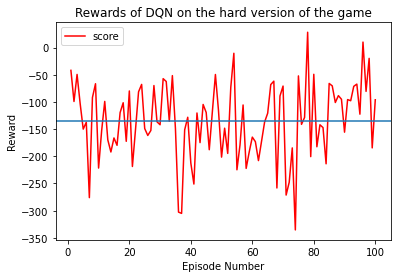

In [14]:
import matplotlib.pyplot as plt
import numpy as np
df.plot(x='episode', y='score', kind='line', color="r")
plt.axhline(y=np.nanmean(df.score))
plt.xlabel("Episode Number")
plt.ylabel("Reward")
plt.title("Rewards of DQN on the hard version of the game")
plt.show()